# Inhalt

1. [Daten](#daten)
2. [Fourier Transform](#fourier)
3. [Data Transformation](#transformation)
    1. [Umgang mit Text und kategorischen Merkmalen](#text-to-num)
        1. [Ordinal Encoder](#ordinal)
        2. [OneHot Encoder](#onehot)
    2. [Behandlung fehlender Eingaben](#missing)
4. [Feature Scaling](#scaling)
    1. [MinMaxScaler](#minmax)
    2. [StandardScaler](#standard)
    3. [Unterschied zwischen vor und nach der Normung](#difference)
5. [Feature Selection](#selection)
    1. [Filtermethoden](#basic)    
        1. [Grundlegende Filtermethoden](#grundlegende)
        2. [Korrelationsfilter-Methoden](#correlation)
            1. [Pearson](#pearson)
            2. [Spearman](#spearman)
6. [Feature Extraction](#extraction)
    1. [Dimensionality Reduction - PCA](#pca)
7. [Anwendungsfälle mit Sensordaten aus der Praxis](#use-case)

# Daten <a name="daten"></a>
Wir werden einen Beispieldatensatz verwenden, der während des Aufbaus dieses Kurses erstellt wurde. Der Datensatz enthält einige Personen und ihre Merkmale wie Alter, Größe, Abschluss und Familienstand.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

daten = [
        [1, 15, 174, 70, 'B. Sc.', 'B. Sc.'],
        [2, 30, 181, 84, 'B. Sc.', 'B. Sc.'],
        [3, 14, 163, 65, 'B. Sc.', 'B. Sc.'],
        [4, 60, 187, 75, 'B. Sc.', 'B. Sc.'],
        [5, 52, 156, 59, 'B. Sc.', 'B. Sc.'],
       ]

daten = pd.DataFrame(daten, columns=['Person', 'Alter', 'Größe (cm)', 'Gewicht (kg)', 'Erster Grad', 'Zweiter Grad'])
daten.head()

,Person,Alter,Größe (cm),Gewicht (kg),Erster Grad,Zweiter Grad
0,1,15,174,70,B. Sc.,B. Sc.
1,2,30,181,84,B. Sc.,B. Sc.
2,3,14,163,65,B. Sc.,B. Sc.
3,4,60,187,75,B. Sc.,B. Sc.
4,5,52,156,59,B. Sc.,B. Sc.


# Fourier Transform  <a name="fourier"></a>
Die Fourier Transformation ist eine mathematische Methode, die Signale vom Zeitbereich in den Frequenzbereich transformiert. Eine visuelle Verdeutlichung des Unterschieds zwischen diesen Bereichen ist in Abbildung 2 dargestellt. Die Abbildung zeigt das gleiche Signal sowohl im Zeit- als auch Frequenzbereich.

- Im Zeitbereich liegen die Signale zeitbezogen vor. So werden Messdaten üblicherweise, über einen festgelegten Messzeitraum, bezogen auf die fortschreitende Zeit, erhoben. Die Signale sind somit eine Funktion der Zeit.
- Im Frequenzbereich werden die Signale, nach den einzelnen.

**Discrete Fourier Transform Formula** 
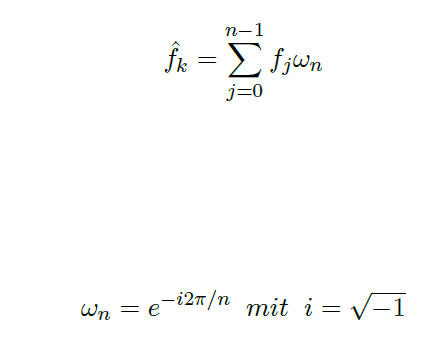

**Fast Fourier Transform Formula** 
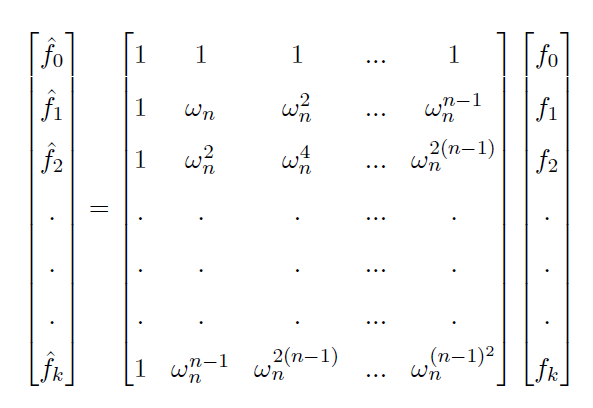

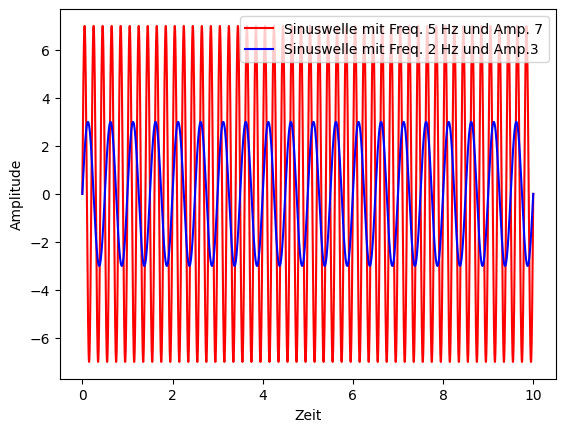

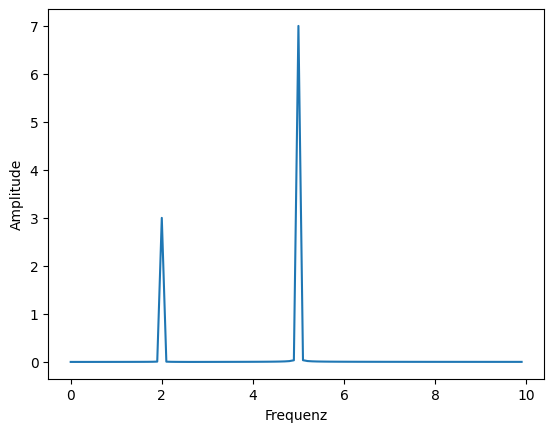

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq

PROBENRATE = 1000
DAUER = 10

def generieren_sinus_welle(amplitude, freq, PROBENRATE, DAUER):
    T = np.linspace(0, DAUER, PROBENRATE * DAUER)
    frequenzen = T * freq
    y = amplitude * np.sin((2 * np.pi) * frequenzen)
    return T, y

t_a7_f5, y_a7_f5 = generieren_sinus_welle(amplitude=7, freq=5, PROBENRATE=PROBENRATE,
                                      DAUER=DAUER)
plt.plot(t_a7_f5, y_a7_f5, c='r')
t_a3_f2, y_a3_f2 = generieren_sinus_welle(amplitude=3, freq=2, PROBENRATE=PROBENRATE,
                                      DAUER=DAUER)
plt.plot(t_a3_f2, y_a3_f2, c='b')
plt.xlabel('Zeit')
plt.ylabel('Amplitude')
plt.legend(['Sinuswelle mit Freq. 5 Hz und Amp. 7', 'Sinuswelle mit Freq. 2 Hz und Amp.3'])
plt.show()


t = t_a7_f5 + t_a3_f2
y = y_a7_f5 + y_a3_f2

N = PROBENRATE * DAUER

yf = fft(y, norm='forward')
tf = fftfreq(N, 1 / PROBENRATE)

plt.plot(tf[0:int(PROBENRATE / DAUER)], np.abs(yf)[0:int(PROBENRATE / DAUER)]*2)
plt.xlabel('Frequenz')
plt.ylabel('Amplitude')
plt.show()

# Data Transformation <a name="transformation"></a>

## Umgang mit Text und kategorischen Merkmalen <a name="text-to-num"></a>
Wie alle Daten enthalten auch die Daten in unserem Datensatz sowohl numerische als auch nicht-numerische Merkmale. Das Problem bei nicht numerischen Merkmalen ist, dass sie beim Training eines maschinellen Lernmodells nicht verwendet werden können. Daher ist es notwendig, diese Art von Attributen in ein Format umzuwandeln, das für das Training des Modells geeignet ist.

In [14]:
daten.head()

,Person,Alter,Größe (cm),Gewicht (kg),Erster Grad,Zweiter Grad
0,1,15,174,70,B. Sc.,B. Sc.
1,2,30,181,84,B. Sc.,B. Sc.
2,3,14,163,65,B. Sc.,B. Sc.
3,4,60,187,75,B. Sc.,B. Sc.
4,5,52,156,59,B. Sc.,B. Sc.


### OneHot Encoder <a name="onehot"></a>
Für jede Kategorie in eine Merkmale wird ein neues Attribut erstellt, dessen Wert 0 oder 1 ist, d. h. wenn die Zeile diese
Kategorie enthält, ist der Wert 1, ansonsten 0.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

neu_person = pd.DataFrame({'Person': [6], 'Alter': [41], 'Größe (cm)': [178], 'Gewicht (kg)': [81], 'Erster Grad': ['B. Sc.'], 'Zweiter Grad': ['M. Sc.']})
daten_ = pd.concat([daten, neu_person], ignore_index=True)

encoded_data = onehot_encoder.fit_transform(daten_[['Erster Grad', 'Zweiter Grad']]).toarray()

daten_['Erster Grad - B. Sc.'] = encoded_data[:, 0]
daten_['Zweiter Grad - B. Sc.'] = encoded_data[:, 1]
daten_['Zweiter Grad - M. Sc.'] = encoded_data[:, 2]
daten_.drop(['Erster Grad', 'Zweiter Grad'], axis=1, inplace=True)

daten_.head(6)

,Person,Alter,Größe (cm),Gewicht (kg),Erster Grad - B. Sc.,Zweiter Grad - B. Sc.,Zweiter Grad - M. Sc.
0,1,15,174,70,1.0,1.0,0.0
1,2,30,181,84,1.0,1.0,0.0
2,3,14,163,65,1.0,1.0,0.0
3,4,60,187,75,1.0,1.0,0.0
4,5,52,156,59,1.0,1.0,0.0
5,6,41,178,81,1.0,0.0,1.0


### Ordinal Encoder <a name="ordinal"></a>
Der Encoder nimmt alle Werte des kategorialen Merkmals, entfernt doppelte Werte und zählt diese. Entsprechend der Gesamtzahl werden den Werten eindeutige Zahlen von 0, 1, 2... zugewiesen.

In [17]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

neu_person = pd.DataFrame({'Person': [6], 'Alter': [41], 'Größe (cm)': [178], 'Gewicht (kg)': [81], 'Erster Grad': ['B. Sc.'], 'Zweiter Grad': ['M. Sc.']})
daten = pd.concat([daten, neu_person], ignore_index=True)

kodierte_daten = ordinal_encoder.fit_transform(daten[['Erster Grad', 'Zweiter Grad']])
daten['Erster Grad'] = kodierte_daten[:, 0]
daten['Zweiter Grad'] = kodierte_daten[:, 1]

daten.head(10)

,Person,Alter,Größe (cm),Gewicht (kg),Erster Grad,Zweiter Grad
0,1,15,174,70,0.0,0.0
1,2,30,181,84,0.0,0.0
2,3,14,163,65,0.0,0.0
3,4,60,187,75,0.0,0.0
4,5,52,156,59,0.0,0.0
5,6,41,178,81,0.0,1.0


## Behandlung fehlender Eingaben <a name="missing"></a>
Sehr oft fehlen einige Werte in unserem Datensatz, und es gibt einige Methoden, um dies zu beheben, z. B:

- Entfernen Sie die Zeilen, zu denen diese Werte gehören.
- den fehlenden Wert durch den Mittelwert, Median oder den häufigsten Wert des Merkmals ersetzen.

In [ ]:
# Entfernen Sie die Zeilen, zu denen diese Werte gehören.
daten.dropna(inplace=True)

# den fehlenden Wert durch den Mittelwert, Median oder den häufigsten Wert des Merkmals ersetzen.
from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer(strategy='most_frequent') # strategies = mean, median, most_frequent
simple_imputer.fit(daten_)

daten_ = pd.DataFrame(simple_imputer.transform(daten_), columns=daten_.columns)
daten_.head(10)

,Person,Alter,Größe (cm),Gewicht (kg),Erster Grad - B. Sc.,Zweiter Grad - B. Sc.,Zweiter Grad - M. Sc.
0,1.0,15.0,174.0,70.0,1.0,1.0,0.0
1,2.0,30.0,181.0,84.0,1.0,1.0,0.0
2,3.0,14.0,163.0,65.0,1.0,1.0,0.0
3,4.0,60.0,187.0,75.0,1.0,1.0,0.0
4,5.0,52.0,156.0,59.0,1.0,1.0,0.0
5,6.0,41.0,178.0,81.0,1.0,0.0,1.0


# Feature Scaling <a name="scaling"></a>
Die Feature Scaling wird verwendet, um Daten meist im Bereich [0,1] zu skalieren, um an Algorithmen für maschinelles Lernen anzupassen.

## MinMaxScaler  <a name="minmax"></a>
Die Min-Max-Skalierung (Min-Max-Scaling) ist eine grundlegende Methode zur Skalierung numerischer Merkmale auf den Bereich [0, 1].

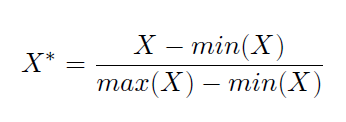

In [19]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
skalierte_daten = minmax_scaler.fit_transform(daten.values)
skalierte_daten = pd.DataFrame(skalierte_daten, columns=daten.columns)
skalierte_daten.head(10)

,Person,Alter,Größe (cm),Gewicht (kg),Erster Grad,Zweiter Grad
0,0.0,0.021739,0.580645,0.44,0.0,0.0
1,0.2,0.347826,0.806452,1.00,0.0,0.0
2,0.4,0.000000,0.225806,0.24,0.0,0.0
3,0.6,1.000000,1.000000,0.64,0.0,0.0
4,0.8,0.826087,0.000000,0.00,0.0,0.0
5,1.0,0.586957,0.709677,0.88,0.0,1.0


## StandardScaler <a name="standard"></a>
Die standardisierungs Skalierung (standardization scaling) funktioniert so, dass sie zunächst den Mittelwert $\mu$ von der Variablen $X$ abzieht und ihn dann durch die Standardabweichung $\sigma$ teilt, so dass die resultierende Verteilung eine Einheitsvarianz hat.

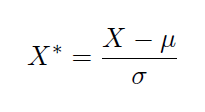


|  |  |
|:-------------|:--------------|
| 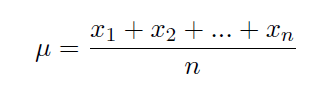 | 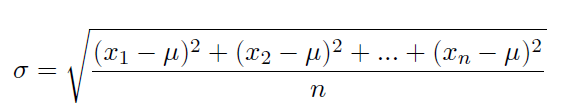 |

In [2]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
skalierte_daten = standard_scaler.fit_transform(daten)
skalierte_daten = pd.DataFrame(skalierte_daten, columns=daten.columns)
skalierte_daten.head()

ValueError: could not convert string to float: 'B. Sc.'

## Unterschied zwischen vor und nach der Skalierung <a name="difference"></a>

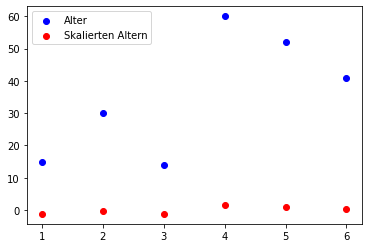

In [21]:
plt.scatter(daten['Person'].values, daten['Alter'].values, c='b')
plt.scatter(daten['Person'].values, skalierte_daten['Alter'].values, c='r')
plt.legend(['Alter', 'Skalierten Altern'])
plt.show()

# Feature Selection <a name="selection"></a>
Die Merkmalsauswahl (auch Variablenauswahl, Attributauswahl, Teilmengenauswahl oder Feature Selection) ist der Prozess, bei dem eine Teilmenge relevanter Merkmale, die für unser Ziel verwendet werden sollen, automatisch oder manuell ausgewählt wird.

Es gibt zweit Feature Selection Methoden:

- Filtermethoden
- Wrappermethoden

## Filtermethoden <a name="basic"></a>
Filtermethoden sind Methoden, die Merkmale aus dem Datensatz auf Grundlage der Charakteristika der Merkmale und nicht auf der Grundlage eines Algorithmus auswählen. Filtermethoden konzentrieren sich auf die Charakteristika jedes einzelnen Merkmals und berechnen diese meist isoliert, um irrelevante, konstante, doppelte oder korrelierte Merkmale aus dem Datensatz zu entfernen.

In die Gruppe der Filtermethoden gehören:

- Grundlegende Filtermethoden
- Korrelationsfilter-Methoden

### Grundlegende Filtermethoden <a name="grundlegende"></a>
Diese Methoden versuchen die beiden nachfolgenden Merkmalkategorien zu erkennen und herauszufiltern:

- *Konstante Merkmale* - als konstantes Merkmal wird ein Merkmal bezeichnet, das in den meisten Zeilen des Datensatzes nur einen Wert hat. 
- *Duplizierende Merkmale* - als dupliziertes Merkmal bezeichnen wir ein Merkmal, das genau dasselbe ist wie ein anderes Merkmal im Datensatz. Eines davon muss aus dem Datensatz herausgefiltert werden.

In [22]:
daten.head(6)

,Person,Alter,Größe (cm),Gewicht (kg),Erster Grad,Zweiter Grad
0,1,15,174,70,0.0,0.0
1,2,30,181,84,0.0,0.0
2,3,14,163,65,0.0,0.0
3,4,60,187,75,0.0,0.0
4,5,52,156,59,0.0,0.0
5,6,41,178,81,0.0,1.0


In [23]:
# Konstante Merkmale 
schwellenwert = 1

konstante_merkmale = []

for merkmale in daten.columns:
    prozentsatz_des_wertes = daten[merkmale].loc[daten[merkmale] == daten[merkmale][0]].count() / daten[merkmale].count()

    if prozentsatz_des_wertes >= 0.95:
        konstante_merkmale.append(merkmale)   

konstante_daten = daten.drop(labels=konstante_merkmale, axis=1)
konstante_daten.head(6)

,Person,Alter,Größe (cm),Gewicht (kg),Zweiter Grad
0,1,15,174,70,0.0
1,2,30,181,84,0.0
2,3,14,163,65,0.0
3,4,60,187,75,0.0
4,5,52,156,59,0.0
5,6,41,178,81,1.0


In [24]:
# Duplizierende Merkmale
daten_t = daten.T

duplizierte_merkmale = daten_t[daten_t.duplicated()].index.values
print(duplizierte_merkmale)

duplizierte_daten = daten.drop(labels=duplizierte_merkmale, axis=1)
duplizierte_daten.head(6)

[]


,Person,Alter,Größe (cm),Gewicht (kg),Erster Grad,Zweiter Grad
0,1,15,174,70,0.0,0.0
1,2,30,181,84,0.0,0.0
2,3,14,163,65,0.0,0.0
3,4,60,187,75,0.0,0.0
4,5,52,156,59,0.0,0.0
5,6,41,178,81,0.0,1.0


### Korrelationsfilter-Methoden <a name="correlation"></a>
Korrelationsmethodenwerden verwendet,umdie Beziehung zwischen zwei Merkmalen zu messen und zu beschreiben. Mit Korrelationsanalysen wird erkannt, welche Variablen bzw. Merkmale voneinander abhängen. Es gibt grundsätzlich drei Arten von Korrelationen: 

- *Positive Korrelation* - bezeichnet eine Beziehung zwischen zwei Merkmalen, bei der die Erhöhung des Wertes eines Merkmales die Erhöhung des Wertes des anderen Merkmals impliziert.
- *Nullkorrelation* - bezeichnet eine Beziehung zwischen zwei Merkmalen, bei der die Werte beider Merkmale variieren und einander nicht entsprechen. 
- *Negative Korrelation* - wird eine Beziehung zwischen zwei Merkmalen genannt, bei der die Erhöhung des Wertes eines dieser Merkmale die Verringerung des Wertes des anderen Merkmals impliziert.

In [5]:
pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import piplite
await piplite.install('seaborn')

ImportError: cannot import name 'piplite' from 'seaborn' (/Users/hashem/Documents/BIGA_Regio/venv/lib/python3.13/site-packages/seaborn/__init__.py)

#### Pearson  <a name="pearson"></a>
Der Pearson-Koeffizient ist ein guter Koeffizient, um die lineare Beziehung zwischen zwei numerischen Merkmalen zu ermitteln.

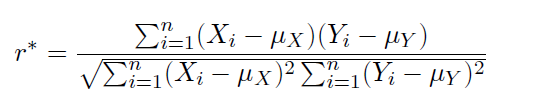

<AxesSubplot:>

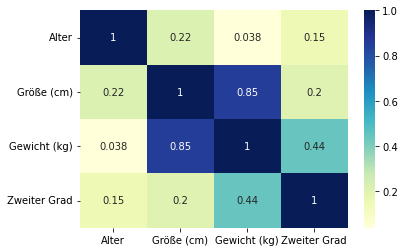

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

pearson = daten[['Alter', 'Größe (cm)', 'Gewicht (kg)', 'Zweiter Grad']].corr(method='pearson')

sns.heatmap(pearson, cmap="YlGnBu", annot=True)

#### Spearman <a name="spearman"></a>
Im Gegensatz zum Pearson-Koeﬀizienten, der verwendet wird, um die lineare Beziehung zwischen zwei Merkmalen zu ermitteln, wird der Spearman-Koeﬀizient in Fällen verwendet, in denen wir eine nicht-lineare Beziehung zwischen zwei Variablen vermuten.

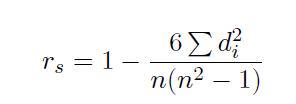

<AxesSubplot:>

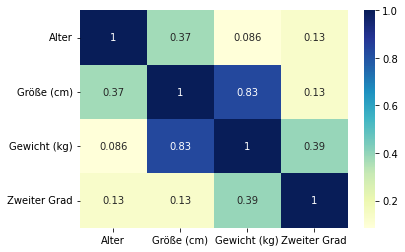

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

spearman = daten[['Alter', 'Größe (cm)', 'Gewicht (kg)',  'Zweiter Grad']].corr(method='spearman')

sns.heatmap(spearman, cmap="YlGnBu", annot=True)

# Feature Extraction <a name="extraction"></a>
Bei der Merkmalsextraktion (Feature-Extraction) werden verschiedene Transformationen an den ursprünglichen Merkmalen vorgenommen, um neue, aussagekräftigere Merkmale zu erzeugen und die Gesamtanzahl der ursprünglichen Merkmalen zu verringern.


## Dimensionality Reduction - PCA <a name="pca"></a>
Der PCA-Algorithmus umfasst 5 Schritte:
1. Standardisierung der Daten
2. Berechnen der Kovarianzmatrix
3. Berechnen der Eigenvektoren und Eigenwerte der Kovarianzmatrix
4. Hauptkomponenten auswählen und einen Merkmalsvektor bilden
5. Ableitung eines neuen Datensatzes

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

D = daten[['Größe (cm)', 'Gewicht (kg)']]
D = standard_scaler.fit_transform(D.values)
pca = PCA(n_components=1)
D_new = pca.fit_transform(D)

print("Eigenvalues: " + str(pca.explained_variance_))
print("Eigenvectors: ")
print(*pca.components_)
print("New dataset: ")
print(D_new)

Eigenvalues: [2.22106513]
Eigenvectors: 
[-0.70710678 -0.70710678]
New dataset: 
[[ 0.13383441]
 [-1.46927082]
 [ 1.27310863]
 [-1.13878961]
 [ 2.22685332]
 [-1.02573593]]
